In [1]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
import itertools
import warnings

In [100]:
def system_compare_exp(system1,system2):
    '''
    Please input the outputs of the queueing function of the two systems.
    '''
    #sys1_time = np.arange(0,system1[7]['simulation_time']+1,system1[7]['simulation_time']/20)
    #sys2_time = np.arange(0,system2[7]['simulation_time']+1,system2[7]['simulation_time']/20)
    
    if system1[7]['simulation_time'] != system2[7]['simulation_time']:
        raise Exception("the two system should have same simulation time")

    aaa = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    bbb = system2[0].iloc[np.where(system2[0]["Time"][1:].to_numpy() != system2[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]

    plt.plot(aaa['Time'],aaa['Live_track'],label='system1')
    plt.plot(bbb['Time'],bbb['Live_track'],label='system2')
    plt.title('Comparison of the two systems')
    plt.xlabel('Time')
    plt.ylabel('# Customers')
    plt.legend()

    sys1_data = np.array([])
    for i in range(1,system1[7]['simulation_time']+1):
        sys1_data=np.append(sys1_data,aaa[aaa['Time']<i].iloc[-1,-3])
    sys2_data = np.array([])
    for i in range(1,system2[7]['simulation_time']+1):
        sys2_data=np.append(sys2_data,bbb[bbb['Time']<i].iloc[-1,-3])
    diff = sys1_data - sys2_data
    
    result = np.array([sum(diff>0)/system1[7]['simulation_time'],\
                       sum(diff==0)/system1[7]['simulation_time'],\
                       sum(diff<0)/system1[7]['simulation_time']])

    # Forward order
    if result[0] - result[2] > 0.75:
        print("System 1 is significantly better than system 2")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")
    elif 0.75 >= result[0] - result[2] > 0.55:
        print("System 1 is substantially better than system 2")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")
    elif 0.55 >= result[0] - result[2] > 0.35:
        print("System 1 is moderately better than system 2")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")
    elif 0.35 >= result[0] - result[2] > 0.15:
        print("System 1 is slightly better than system 2")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")
    
    # 5/5
    elif 0.15 >= result[0] - result[2] > -0.15:
        print("The 2 systems have almost the same performance")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")
    
    # reverse order
    elif -0.15 >= result[0] - result[2] > -0.35:
        print("System 2 is slightly better than system 1")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]} of the time")
    elif -0.35 >= result[0] - result[2] > -0.55:
        print("System 2 is moderately better than system 1")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")
    elif -0.55 >= result[0] - result[2] > -0.75:
        print("System 2 is substantially better than system 1")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")
    elif -0.75 >= result[0] - result[2]:
        print("System 2 is significantly better than system 1")
        print(f"System 1 is better on {result[0]*100}% of the time")
        print(f"System 2 is better on {result[2]*100}% of the time")


In [ ]:
# aaa = 
# bbb = 

System 2 is moderately better than system 1
System 1 is better on 30.0% of the time
System 2 is better on 67.0% of the time


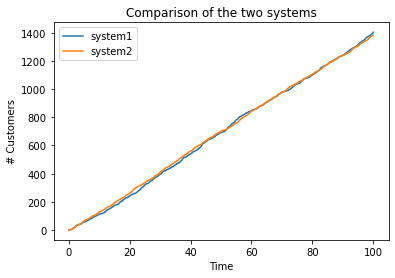

In [102]:
system_compare_exp(aaa,bbb)